<a href="https://colab.research.google.com/github/willkakuta/Projeto_Roof_Imoveis/blob/main/Projeto_Roof_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas que eu acredito que possam ser usadas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Importando arquivo cvs para montar o dataframe e fazer as análises.

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Analisando os dados apresentados.
Foi preciso encontrar algum fator que mostrasse o melhor custo benefício do imóvel e a melhor lucratividade que a empresa possa ter ao investir. 
Como os dados apresentam casas que foram vendidadas e o preço de venda, tentei achar uma relação de comportamento do consumidor, quais são os tipos de imóveis mais procurados dentre essas casas, pois se há uma relação de frequência de vendas para um tipo determinado de imóvel, conseguimos tirar um padrão. E saberemos na teoria o que venderia com mais facilidade.

Primeiro comparativo foi entre os 15 imóveis mais próximos, relação de área habitável e lote. Procurei ver imóveis maiores que a média pois quando for feito o comparativo de preço, muito provável que esses imóveis terão o m² mais valiosos que os outros, e um argumento a mais na hora da venda.


Comparando tamanhos de imóveis

In [ ]:
df = df[(df['sqft_living15']<=df['sqft_living']) & (df['sqft_lot15']<=df['sqft_lot'])]

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21602,844000965,20140626T000000,224000.0,3,1.75,1500,11968,1.0,0,0,...,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


Padrão de Consumo:

Estrutura do Imóvel

Quartos

In [ ]:
media = np.mean(df['bedrooms'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['bedrooms'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['bedrooms'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 3.68 
Moda: 4.0 
Mediana: 4.0


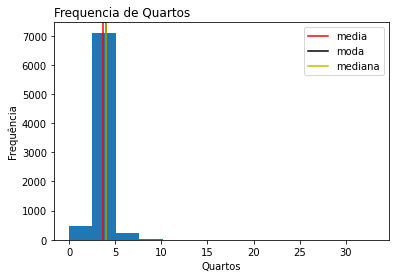

In [ ]:
fig = plt.figure()
h = plt.hist(df['bedrooms'], bins = 13)
plt.title("Frequencia de Quartos", loc = 'left')
plt.xlabel('Quartos')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Banheiros

In [ ]:
media = np.mean(df['bathrooms'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['bathrooms'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['bathrooms'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 2.34 
Moda: 2.5 
Mediana: 2.5


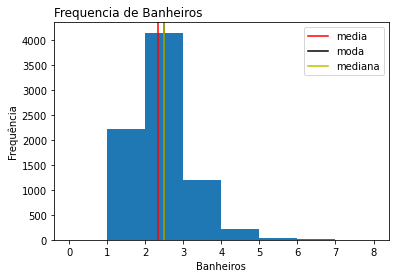

In [ ]:
fig = plt.figure()
h = plt.hist(df['bathrooms'], bins = 8)
plt.title("Frequencia de Banheiros", loc = 'left')
plt.xlabel('Banheiros')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Andares

In [ ]:
media = np.mean(df['floors'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['floors'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['floors'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 1.55 
Moda: 2.0 
Mediana: 1.5


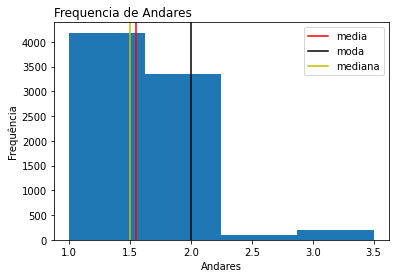

In [ ]:
fig = plt.figure()
h = plt.hist(df['floors'], bins = 4)
plt.title("Frequencia de Andares", loc = 'left')
plt.xlabel('Andares')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Vista para água

In [ ]:
media = np.mean(df['waterfront'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['waterfront'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['waterfront'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 0.01 
Moda: 0.0 
Mediana: 0.0


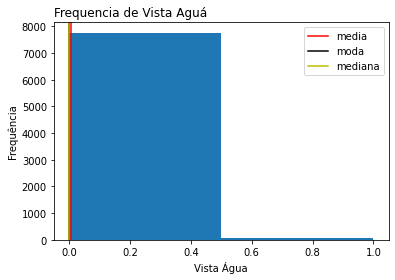

In [ ]:
fig = plt.figure()
h = plt.hist(df['waterfront'], bins = 2)
plt.title("Frequencia de Vista Aguá", loc = 'left')
plt.xlabel('Vista Água')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Segundo comparativo foi feito com base nas características do imóvel para saber qual tipo de estrutura que foi mais vendido neste período. 

In [ ]:
df = df[(df['bedrooms']>=3) & (df['bedrooms']<=5) & (df['bathrooms']>=2) & (df['bathrooms']<=3) & (df['floors']>=2)]

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
16,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
37,2768000400,20141230T000000,640000.0,4,2.00,2360,6000,2.0,0,0,...,8,2360,0,1904,0,98107,47.6702,-122.362,1730,4700
45,8035350320,20140718T000000,488000.0,3,2.50,3160,13603,2.0,0,0,...,8,3160,0,2003,0,98019,47.7443,-121.977,3050,9232
55,9822700295,20140512T000000,885000.0,4,2.50,2830,5000,2.0,0,0,...,9,2830,0,1995,0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,20140813T000000,679950.0,5,2.75,3600,9437,2.0,0,0,...,9,3600,0,2014,0,98059,47.4822,-122.131,3550,9421
21598,8956200760,20141013T000000,541800.0,4,2.50,3118,7866,2.0,0,2,...,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023


Condição do Imóvel

Vista

In [ ]:
media = np.mean(df['view'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['view'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['view'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 0.18 
Moda: 0.0 
Mediana: 0.0


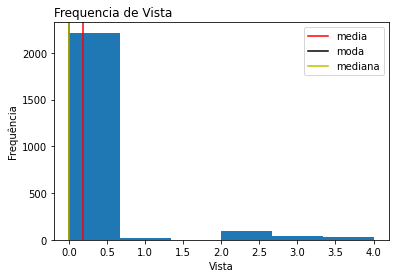

In [ ]:
fig = plt.figure()
h = plt.hist(df['view'], bins = 6)
plt.title("Frequencia de Vista", loc = 'left')
plt.xlabel('Vista')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Condição do Imóvel

In [ ]:
media = np.mean(df['condition'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['condition'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['condition'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 3.21 
Moda: 3.0 
Mediana: 3.0


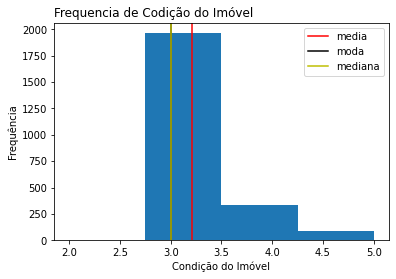

In [ ]:
fig = plt.figure()
h = plt.hist(df['condition'], bins = 4)
plt.title("Frequencia de Codição do Imóvel", loc = 'left')
plt.xlabel('Condição do Imóvel')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Material usado na Construção

In [ ]:
media = np.mean(df['grade'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['grade'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['grade'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 8.22 
Moda: 8.0 
Mediana: 8.0


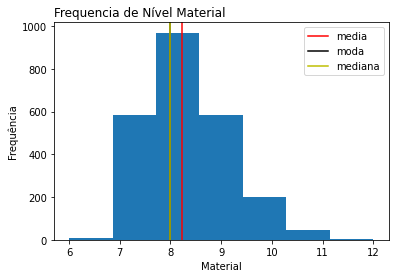

In [ ]:
fig = plt.figure()
h = plt.hist(df['grade'], bins = 7)
plt.title("Frequencia de Nível Material", loc = 'left')
plt.xlabel('Material')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Ano de Contrução

In [ ]:
media = np.mean(df['yr_built'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['yr_built'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['yr_built'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 1989.82 
Moda: 2003.0 
Mediana: 1997.0


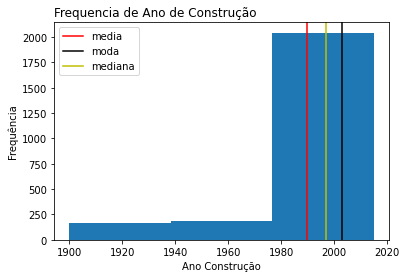

In [ ]:
fig = plt.figure()
h = plt.hist(df['yr_built'], bins = 3)
plt.title("Frequencia de Ano de Construção", loc = 'left')
plt.xlabel('Ano Construção')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Restauração

In [ ]:
media = np.mean(df['yr_renovated'])
media = np.float64(media)
media

moda, count1 = stats.mode(df['yr_renovated'])
moda = np.float64(moda[0])
moda

mediana = np.median(df['yr_renovated'])
mediana

print(f'Media: {media:.2f} \nModa: {moda} \nMediana: {mediana}')

Media: 79.21 
Moda: 0.0 
Mediana: 0.0


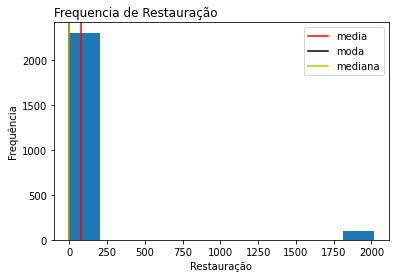

In [ ]:
fig = plt.figure()
h = plt.hist(df['yr_renovated'], bins = 10)
plt.title("Frequencia de Restauração", loc = 'left')
plt.xlabel('Restauração')
plt.ylabel('Frequência')
xCoords = pd.Series([media, moda, mediana], ['media','moda','mediana'])
colors = ['r','k','y']
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)
    
plt.legend()

Terceiro comparativo foi feito com base na condição de preservação do imóvel e características do ambiente.

In [ ]:
df = df[(df['condition']>=3) & (df['condition']>=4) & (df['grade']>=7) & (df['grade']<=9) & 
        (df['yr_built']>=1980) & (df['waterfront']==0) & (df['view']==0) & (df['yr_renovated']==0)]


df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
145,1526069017,20141203T000000,921500.0,4,2.50,3670,315374,2.0,0,0,...,9,3670,0,1994,0,98077,47.7421,-122.026,2840,87991
461,1843100340,20150305T000000,348000.0,3,2.25,2570,8491,2.0,0,0,...,8,2570,0,1989,0,98042,47.3759,-122.125,2400,8049
544,7800800160,20141121T000000,375000.0,3,2.25,2120,18500,2.0,0,0,...,8,2120,0,1983,0,98031,47.3914,-122.169,2120,14479
831,8856890200,20140626T000000,350000.0,3,2.25,1780,16290,2.0,0,0,...,8,1780,0,1987,0,98058,47.4622,-122.127,1780,8810
1025,1862900350,20140610T000000,315000.0,4,2.50,1930,9643,2.0,0,0,...,7,1930,0,1992,0,98031,47.4065,-122.180,1930,7525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,2025701080,20150318T000000,305000.0,3,2.25,1370,6600,2.0,0,0,...,7,1370,0,1993,0,98038,47.3504,-122.035,1370,6600
18259,1473120730,20140627T000000,469900.0,4,2.50,2990,8913,2.0,0,0,...,9,2990,0,1991,0,98058,47.4353,-122.159,2740,8030
18884,1626069220,20140905T000000,562000.0,3,2.50,2400,97138,2.0,0,0,...,8,2400,0,1983,0,98077,47.7361,-122.046,2230,54450
19159,104510230,20141119T000000,252000.0,3,2.00,1540,7210,2.0,0,0,...,7,1540,0,1984,0,98023,47.3128,-122.351,1500,7210


Excluindo as variáveis que não apresentaram mudanças relevantes nas frequências do histograma ou que não foram usados na tese.

In [ ]:
df = df.drop(columns=['waterfront'])
df = df.drop(columns=['view'])
df = df.drop(columns=['sqft_basement'])
df = df.drop(columns=['yr_renovated'])
df = df.drop(columns=['sqft_above'])
df = df.drop(columns=['lat'])
df = df.drop(columns=['long'])
df = df.drop(columns=['date'])

df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
145,1526069017,921500.0,4,2.50,3670,315374,2.0,4,9,1994,98077,2840,87991
461,1843100340,348000.0,3,2.25,2570,8491,2.0,4,8,1989,98042,2400,8049
544,7800800160,375000.0,3,2.25,2120,18500,2.0,4,8,1983,98031,2120,14479
831,8856890200,350000.0,3,2.25,1780,16290,2.0,4,8,1987,98058,1780,8810
1025,1862900350,315000.0,4,2.50,1930,9643,2.0,4,7,1992,98031,1930,7525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,2025701080,305000.0,3,2.25,1370,6600,2.0,4,7,1993,98038,1370,6600
18259,1473120730,469900.0,4,2.50,2990,8913,2.0,4,9,1991,98058,2740,8030
18884,1626069220,562000.0,3,2.50,2400,97138,2.0,5,8,1983,98077,2230,54450
19159,104510230,252000.0,3,2.00,1540,7210,2.0,4,7,1984,98023,1500,7210


Depois de ter achado um certo padrão de imóvel.
Quis procurar a localidade do zipcode, onde conseguiria ver informações externas sobre os imóveis daquela região.
Claro, que poderia ter afunilado mais a busca, e definido mais o padrão, porém fiquei com certo receio de perder alguma oportunidade de imóvel e como aparentemente era poucos imóveis achei que não daria trabalho fazer deste modo.

In [ ]:
freq = df['zipcode'].value_counts() 

freq

98042    20
98038    12
98029    11
98052    10
98092     7
98074     6
98077     6
98033     6
98031     6
98058     5
98023     5
98027     5
98022     5
98034     4
98056     4
98010     3
98007     3
98070     2
98059     2
98003     2
98011     2
98040     1
98001     1
98030     1
98006     1
98107     1
98014     1
98004     1
98075     1
98002     1
98115     1
98109     1
98105     1
98199     1
98028     1
98133     1
Name: zipcode, dtype: int64

Depois de ter achado os zipcode de cada imóvel, comparei o preço médio dos imóvel de cada zipcode com os preços dos imóveis filtrados, pelo site https://www.unitedstateszipcodes.org/ . Assim, conseguindo achar oportunidades de negócios, imóveis com preço abaixo do valor de mercado.

In [ ]:
def potlucro(x,y):
  pct = []
  for i in x['price']:
    r = (i * 100) / y
    r = 100 - r
    pct.append(round(r))
  print(pct)

In [ ]:
def zpcode(x,y):
  x = df[df['zipcode']==y]

Foi feito 2 funções, porém tive problemas com a função zpcode, então tive que recorrer ao copiar e colar. O que não mudou muita coisa pois a função era bem simples. A outra função potlucro que criei para verificar a % de potencial lucro só analisando o preço médio de cada zipcode. 

Lembrando que não necessariamente esta % representa o lucro, mas sim um indicativo que pode mostrar uma boa oportunidade de negócio.

In [ ]:
zp1 = df[df['zipcode']==98042]

#ZIP Code 98042 - Median Home Value	$297100
zp1 = zp1[(zp1['price']<297100)]

zp1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
1302,2329800240,285000.0,4,3.00,1900,7194,2.0,4,7,1988,98042,1690,7194
4004,4178500100,282500.0,3,2.25,1670,7150,2.0,4,7,1990,98042,1570,7040
6524,2329800430,254000.0,3,2.25,1660,8188,2.0,4,7,1988,98042,1660,7000
10262,1796360340,269950.0,3,2.00,1660,8641,2.0,4,8,1987,98042,1490,8641


In [ ]:
potlucro(zp1,297100)

[4, 5, 15, 9]


Criando uma lista e incluindo ela como uma coluna para mostrar o potencial de lucro que o imóvel teria se fosse vendido pelo preço médio do zip code. Assim conseguimos ter uma vizualização mais fácil para achar imóveis com ótimo custo/benefício e abaixo do valor de mercado.

In [ ]:
zp1['potencial_lucro%'] = [4, 5, 15, 9]

zp1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
1302,2329800240,285000.0,4,3.00,1900,7194,2.0,4,7,1988,98042,1690,7194,4
4004,4178500100,282500.0,3,2.25,1670,7150,2.0,4,7,1990,98042,1570,7040,5
6524,2329800430,254000.0,3,2.25,1660,8188,2.0,4,7,1988,98042,1660,7000,15
10262,1796360340,269950.0,3,2.00,1660,8641,2.0,4,8,1987,98042,1490,8641,9


In [ ]:
zp2 = df[df['zipcode']==98038]

#ZIP Code 98038 - Median Home Value	$317700
zp2 = zp2[(zp2['price']<317700)]

zp2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
5738,2025700080,265000.0,3,2.50,1530,6000,2.0,4,7,1991,98038,1360,6000
6713,1545802850,286000.0,4,2.50,1820,7930,2.0,5,7,1989,98038,1490,7930
9904,2215900800,290000.0,3,2.50,2000,7414,2.0,4,7,1993,98038,2000,7414
12524,2025701530,282000.0,3,2.50,1610,6000,2.0,4,7,1993,98038,1570,6000
14448,2025700790,290700.0,3,2.50,1670,6666,2.0,4,7,1992,98038,1370,6170
17567,2025701390,316000.0,3,2.25,1900,7479,2.0,4,7,1992,98038,1520,6559
17693,2215900900,295000.0,3,2.50,1690,8564,2.0,4,7,1992,98038,1690,7532
17694,2025700740,275250.0,3,2.25,1520,7199,2.0,4,7,1992,98038,1410,6751
17698,2215900930,225000.0,3,2.50,2000,9202,2.0,4,7,1992,98038,1750,7827
18220,2025701080,305000.0,3,2.25,1370,6600,2.0,4,7,1993,98038,1370,6600


In [ ]:
potlucro(zp2,317700)

[17, 10, 9, 11, 8, 1, 7, 13, 29, 4]


In [ ]:
zp2['potencial_lucro%'] = [17, 10, 9, 11, 8, 1, 7, 13, 29, 4]

zp2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
5738,2025700080,265000.0,3,2.50,1530,6000,2.0,4,7,1991,98038,1360,6000,17
6713,1545802850,286000.0,4,2.50,1820,7930,2.0,5,7,1989,98038,1490,7930,10
9904,2215900800,290000.0,3,2.50,2000,7414,2.0,4,7,1993,98038,2000,7414,9
12524,2025701530,282000.0,3,2.50,1610,6000,2.0,4,7,1993,98038,1570,6000,11
14448,2025700790,290700.0,3,2.50,1670,6666,2.0,4,7,1992,98038,1370,6170,8
17567,2025701390,316000.0,3,2.25,1900,7479,2.0,4,7,1992,98038,1520,6559,1
17693,2215900900,295000.0,3,2.50,1690,8564,2.0,4,7,1992,98038,1690,7532,7
17694,2025700740,275250.0,3,2.25,1520,7199,2.0,4,7,1992,98038,1410,6751,13
17698,2215900930,225000.0,3,2.50,2000,9202,2.0,4,7,1992,98038,1750,7827,29
18220,2025701080,305000.0,3,2.25,1370,6600,2.0,4,7,1993,98038,1370,6600,4


In [ ]:
zp3 = df[df['zipcode']==98029]

#ZIP Code 98029 - Median Home Value	$465200
zp3 = zp3[(zp3['price']<465200)]

zp3

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
14134,8665050220,459000.0,3,2.5,1780,4000,2.0,4,8,1995,98029,1730,4000


In [ ]:
potlucro(zp3,465200)

[1]


In [ ]:
zp4 = df[df['zipcode']==98052]

#ZIP Code 98052 - Median Home Value	$465200
zp4 = zp4[(zp4['price']<465200)]

zp4

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp5 = df[df['zipcode']==98092]

#ZIP Code 98092 - Median Home Value	$287600
zp5 = zp5[(zp5['price']<287600)]

zp5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
2221,7137900960,235000.0,4,2.0,1570,9415,2.0,4,7,1984,98092,1550,8978


In [ ]:
potlucro(zp5,287600)

[18]


In [ ]:
zp5['potencial_lucro%'] = [18]

zp5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
2221,7137900960,235000.0,4,2.0,1570,9415,2.0,4,7,1984,98092,1550,8978,18


In [ ]:
zp6 = df[df['zipcode']==98074]

#ZIP Code 98074 - Median Home Value	$556000
zp6 = zp6[(zp6['price']<556000)]

zp6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
6961,8078410280,550000.0,3,2.5,1980,9061,2.0,4,8,1987,98074,1930,8869
9362,7715801030,510000.0,4,2.5,1620,8125,2.0,4,7,1983,98074,1480,8120


In [ ]:
potlucro(zp6,556000)

[1, 8]


In [ ]:
zp6['potencial_lucro%'] = [1, 8]

zp6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
6961,8078410280,550000.0,3,2.5,1980,9061,2.0,4,8,1987,98074,1930,8869,1
9362,7715801030,510000.0,4,2.5,1620,8125,2.0,4,7,1983,98074,1480,8120,8


In [ ]:
zp7 = df[df['zipcode']==98077]

#ZIP Code 98077 - Median Home Value	$570700
zp7 = zp7[(zp7['price']<570700)]

zp7

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
18884,1626069220,562000.0,3,2.5,2400,97138,2.0,5,8,1983,98077,2230,54450


In [ ]:
potlucro(zp7,556000)

[-1]


In [ ]:
zp8 = df[df['zipcode']==98033]

#ZIP Code 98033 - Median Home Value	$528300
zp8 = zp8[(zp8['price']<528300)]

zp8

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp9 = df[df['zipcode']==98031]

#ZIP Code 98031 - Median Home Value	$271500
zp9 = zp9[(zp9['price']<271500)]

zp9

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp10 = df[df['zipcode']==98058]

#ZIP Code 98058 - Median Home Value	$302200
zp10 = zp10[(zp10['price']<302200)]

zp10

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp11 = df[df['zipcode']==98023]

#ZIP Code 98023 - Median Home Value	$265100
zp11 = zp11[(zp11['price']<265100)]

zp11

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
16177,2791500020,250500.0,3,2.0,1710,7225,2.0,4,7,1988,98023,1710,7225
19159,104510230,252000.0,3,2.0,1540,7210,2.0,4,7,1984,98023,1500,7210


In [ ]:
potlucro(zp11,265100)

[6, 5]


In [ ]:
zp11['potencial_lucro%'] = [6, 5]

zp11

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
16177,2791500020,250500.0,3,2.0,1710,7225,2.0,4,7,1988,98023,1710,7225,6
19159,104510230,252000.0,3,2.0,1540,7210,2.0,4,7,1984,98023,1500,7210,5


In [ ]:
zp12 = df[df['zipcode']==98027]

#ZIP Code 98027 - Median Home Value	$478800
zp12 = zp12[(zp12['price']<478800)]

zp12

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
14978,1623069071,475000.0,3,2.5,2220,60984,2.0,4,8,1987,98027,1930,55333


In [ ]:
potlucro(zp12,478800)

[1]


In [ ]:
zp12['potencial_lucro%'] = [1]

zp12

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
14978,1623069071,475000.0,3,2.5,2220,60984,2.0,4,8,1987,98027,1930,55333,1


In [ ]:
zp13 = df[df['zipcode']==98022]

#ZIP Code 98022 - Median Home Value	$300800
zp13 = zp13[(zp13['price']<300800)]

zp13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
4254,6802200100,271900.0,3,2.0,1450,8771,2.0,4,7,1991,98022,1450,8653
8189,7138200150,297000.0,5,2.5,1970,8605,2.0,4,7,1994,98022,1970,8460


In [ ]:
potlucro(zp13,300800)

[10, 1]


In [ ]:
zp13['potencial_lucro%'] = [10, 1]

zp13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
4254,6802200100,271900.0,3,2.0,1450,8771,2.0,4,7,1991,98022,1450,8653,10
8189,7138200150,297000.0,5,2.5,1970,8605,2.0,4,7,1994,98022,1970,8460,1


In [ ]:
zp14 = df[df['zipcode']==98034]

#ZIP Code 98034 - Median Home Value	$364900
zp14 = zp14[(zp14['price']<364900)]

zp14

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
2991,8835220090,313500.0,3,2.25,1440,3488,2.0,4,7,1983,98034,1390,3488
16314,8835210480,336500.0,3,2.25,1420,3433,2.0,4,7,1981,98034,1150,3432


In [ ]:
potlucro(zp14,364900)

[14, 8]


In [ ]:
zp14['potencial_lucro%'] = [14, 8]

zp14

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
2991,8835220090,313500.0,3,2.25,1440,3488,2.0,4,7,1983,98034,1390,3488,14
16314,8835210480,336500.0,3,2.25,1420,3433,2.0,4,7,1981,98034,1150,3432,8


In [ ]:
zp15 = df[df['zipcode']==98056]

#ZIP Code 98056 - Median Home Value	$342600
zp15 = zp15[(zp15['price']<342600)]

zp15

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp16 = df[df['zipcode']==98010]

#ZIP Code 98010 - Median Home Value	$319300
zp16 = zp16[(zp16['price']<319300)]

zp16

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
2826,8100000090,256000.0,3,2.5,1480,7200,2.0,5,7,1995,98010,1350,7200
9404,4233400490,262000.0,3,2.5,1680,10300,2.0,4,7,1994,98010,1680,9849
16315,844000225,267000.0,3,2.5,1690,10336,2.0,4,7,1989,98010,1580,7700


In [ ]:
potlucro(zp16,319300)

[20, 18, 16]


In [ ]:
zp16['potencial_lucro%'] = [20, 18, 16]

zp16

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
2826,8100000090,256000.0,3,2.5,1480,7200,2.0,5,7,1995,98010,1350,7200,20
9404,4233400490,262000.0,3,2.5,1680,10300,2.0,4,7,1994,98010,1680,9849,18
16315,844000225,267000.0,3,2.5,1690,10336,2.0,4,7,1989,98010,1580,7700,16


In [ ]:
zp17 = df[df['zipcode']==98007]

#ZIP Code 98007 - Median Home Value	$379000
zp17 = zp17[(zp17['price']<379000)]

zp17

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp18 = df[df['zipcode']==98070]

#ZIP Code 98070 - Median Home Value	$413400
zp18 = zp18[(zp18['price']<413400)]

zp18

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp19 = df[df['zipcode']==98059]

#ZIP Code 98059 - Median Home Value	$363500
zp19 = zp19[(zp19['price']<363500)]

zp19

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp20 = df[df['zipcode']==98003]

#ZIP Code 98003 - Median Home Value	$221600
zp20 = zp20[(zp20['price']<221600)]

zp20

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp21 = df[df['zipcode']==98011]

#ZIP Code 98011 - Median Home Value	$351000
zp21 = zp21[(zp21['price']<351000)]

zp21

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp22 = df[df['zipcode']==98040]

#ZIP Code 98040 - Median Home Value	$864000
zp22 = zp22[(zp22['price']<864000)]

zp22

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp23 = df[df['zipcode']==98001]

#ZIP Code 98001 - Median Home Value	$268800
zp23 = zp23[(zp23['price']<268800)]

zp23

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp24 = df[df['zipcode']==98030]

#ZIP Code 98030 - Median Home Value	$251700
zp24 = zp24[(zp24['price']<251700)]

zp24

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp25 = df[df['zipcode']==98006]

#ZIP Code 98006 - Median Home Value	$574000
zp25 = zp25[(zp25['price']<574000)]

zp25

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp26 = df[df['zipcode']==98107]

#ZIP Code 98107 - Median Home Value	$447700
zp26 = zp26[(zp26['price']<447700)]

zp26

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp27 = df[df['zipcode']==98014]

#ZIP Code 98014 - Median Home Value	$410900
zp27 = zp27[(zp27['price']<410900)]

zp27

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp28 = df[df['zipcode']==98004]

#ZIP Code 98004 - Median Home Value	$723300
zp28 = zp28[(zp28['price']<723300)]

zp28

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp29 = df[df['zipcode']==98075]

#ZIP Code 98075 - Median Home Value	$614100
zp29 = zp29[(zp29['price']<614100)]

zp29

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp30 = df[df['zipcode']==98002]

#ZIP Code 98002 - Median Home Value	$167100
zp30 = zp30[(zp30['price']<167100)]

zp30

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp31 = df[df['zipcode']==98115]

#ZIP Code 98115 - Median Home Value	$492700
zp31 = zp31[(zp31['price']<492700)]

zp31

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp32 = df[df['zipcode']==98109]

#ZIP Code 98109 - Median Home Value	$451400
zp32 = zp32[(zp32['price']<451400)]

zp32

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp33 = df[df['zipcode']==98105]

#ZIP Code 98105 - Median Home Value	$613900
zp33 = zp33[(zp33['price']<613900)]

zp33

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp34 = df[df['zipcode']==98199]

#ZIP Code 98199 - Median Home Value	$606200
zp34 = zp34[(zp34['price']<606200)]

zp34

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp35 = df[df['zipcode']==98028]

#ZIP Code 98028 - Median Home Value	$386200
zp35 = zp35[(zp35['price']<386200)]

zp35

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zp36 = df[df['zipcode']==98133]

#ZIP Code 98133 - Median Home Value	$326400
zp36 = zp36[(zp36['price']<326400)]

zp36

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
frames = [zp1, zp2, zp5, zp6, zp11, zp12, zp13, zp14, zp16]
  
melhorescasas = pd.concat(frames)
melhorescasas.sort_values(by='potencial_lucro%', ascending=False).head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
17698,2215900930,225000.0,3,2.5,2000,9202,2.0,4,7,1992,98038,1750,7827,29
2826,8100000090,256000.0,3,2.5,1480,7200,2.0,5,7,1995,98010,1350,7200,20
2221,7137900960,235000.0,4,2.0,1570,9415,2.0,4,7,1984,98092,1550,8978,18
9404,4233400490,262000.0,3,2.5,1680,10300,2.0,4,7,1994,98010,1680,9849,18
5738,2025700080,265000.0,3,2.5,1530,6000,2.0,4,7,1991,98038,1360,6000,17


5 Melhores casas para se investir com base no comportamento do consumidor, medido pela frequencia das casas mais vendidas, comparando uma com as outras, olhando preço médio do zip code para identificar melhores oportunidades de negócio com o potencial de % de lucro que se pode obter na venda.

Sei que poderia ter excluido os zipcode que tinha 1 casa, ou 2 para afunilar a amostragem, mas como era pouca coisa eu preferi fazer tudo, e poderia ter feito a análise ao olho nu, mas deixei os códigos sem nada para mostrar como cheguei nesta conclusão.

Aqui importei novamente o arquivo, pois eu tinha utilizado as mesmas variáveis para as melhores casas, o que acarretou em alguns erros, aí depois mudei as variáveis para não ocorrer esses erros.

In [ ]:
pc = pd.read_csv('kc_house_data.csv')
pc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Fiz praticamente o mesmo processo que utilizei para identificar as melhores casas, só que fiz o inverso para que fosse o mais distante possível do comportamento do consumidor, m² caro, condição o imóvel o pior possível, e caro comparado ao preço médio por zipcode. 


In [ ]:
pc = pc[(pc['sqft_living15']>=pc['sqft_living']) & (pc['sqft_lot15']>=pc['sqft_lot'])]

pc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [ ]:
pc = pc[(pc['bedrooms']<3) | (pc['bedrooms']>5)]
pc = pc[(pc['bathrooms']<2) | (pc['bathrooms']>3)]
pc = pc[(pc['condition']<3)]
pc = pc[(pc['grade']<7) | (pc['grade']>9)]
pc = pc[pc['yr_built']<1980]
pc = pc[pc['view']==0]

pc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1325,4337000160,20150127T000000,110000.0,2,1.00,830,7590,1.0,0,0,...,6,830,0,1943,0,98166,47.4784,-122.335,980,7590
3202,723049596,20140509T000000,255000.0,2,1.00,810,7980,1.0,0,0,...,6,810,0,1928,0,98146,47.4890,-122.337,1440,7980
4563,1900000195,20140630T000000,100000.0,2,1.00,930,7623,1.0,0,0,...,6,930,0,1942,0,98166,47.4670,-122.349,1300,7641
4651,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5303,5128000010,20150105T000000,99000.0,2,1.00,960,8236,1.0,0,0,...,6,960,0,1948,0,98058,47.4698,-122.166,1260,8236
8461,4006000401,20140811T000000,140000.0,2,1.00,900,6400,1.0,0,0,...,6,900,0,1940,0,98118,47.5287,-122.281,1350,6405
8600,2461900845,20140903T000000,310000.0,1,1.00,570,6000,1.0,0,0,...,5,570,0,1918,0,98136,47.5517,-122.385,1530,6000
8623,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636


In [ ]:
freq = pc['zipcode'].value_counts() 

freq

98146    7
98118    4
98166    3
98136    2
98148    2
98014    1
98106    1
98058    1
98108    1
98126    1
98178    1
98125    1
98116    1
98024    1
Name: zipcode, dtype: int64

Exclusão dos dados que não tiveram relevância para a tese

In [ ]:
pc = pc.drop(columns=['waterfront'])
pc = pc.drop(columns=['sqft_basement'])
pc = pc.drop(columns=['yr_renovated'])
pc = pc.drop(columns=['sqft_above'])
pc = pc.drop(columns=['lat'])
pc = pc.drop(columns=['long'])
pc = pc.drop(columns=['date'])
pc = pc.drop(columns=['view'])

pc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
465,8658300340,80000.0,1,0.75,430,5050,1.0,2,4,1912,98014,1200,7500
1325,4337000160,110000.0,2,1.00,830,7590,1.0,2,6,1943,98166,980,7590
3202,723049596,255000.0,2,1.00,810,7980,1.0,1,6,1928,98146,1440,7980
4563,1900000195,100000.0,2,1.00,930,7623,1.0,2,6,1942,98166,1300,7641
4651,859000110,125000.0,1,1.00,500,7440,1.0,1,5,1928,98106,1350,7440
4868,6896300380,228000.0,0,1.00,390,5900,1.0,2,4,1953,98118,2170,6000
5303,5128000010,99000.0,2,1.00,960,8236,1.0,2,6,1948,98058,1260,8236
8461,4006000401,140000.0,2,1.00,900,6400,1.0,2,6,1940,98118,1350,6405
8600,2461900845,310000.0,1,1.00,570,6000,1.0,2,5,1918,98136,1530,6000
8623,6303400395,325000.0,1,0.75,410,8636,1.0,2,4,1953,98146,1190,8636


In [ ]:
zc1 = pc[pc['zipcode']==98146]

#ZIP Code 98146 - Median Home Value	$308400
zc1 = zc1[(zc1['price']>308400)]

zc1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
8623,6303400395,325000.0,1,0.75,410,8636,1.0,2,4,1953,98146,1190,8636


In [ ]:
potlucro(zc1,308400)

[-5]


In [ ]:
zc1['potencial_lucro%'] = [-5]
zc1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
8623,6303400395,325000.0,1,0.75,410,8636,1.0,2,4,1953,98146,1190,8636,-5


In [ ]:
zc2 = pc[pc['zipcode']==98118]

#ZIP Code 98118 - Median Home Value	$350700
zc2 = zc2[(zc2['price']>350700)]

zc2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc3 = pc[pc['zipcode']==98166]

#ZIP Code 98166 - Median Home Value	$386900
zc3 = zc3[(zc3['price']>386900)]

zc3

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc4 = pc[pc['zipcode']==98136]

#ZIP Code 98136 - Median Home Value	$445700
zc4 = zc4[(zc4['price']>445700)]

zc4

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc5 = pc[pc['zipcode']==98148]

#ZIP Code 98148 - Median Home Value	$255900
zc5 = zc5[(zc5['price']>255900)]

zc5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
13629,2023049218,445000.0,2,1.0,930,7740,1.0,1,5,1932,98148,1620,8584


In [ ]:
potlucro(zc5,255900)

[-74]


In [ ]:
zc5['potencial_lucro%'] = [-74]

zc5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
13629,2023049218,445000.0,2,1.0,930,7740,1.0,1,5,1932,98148,1620,8584,-74


In [ ]:
zc6 = pc[pc['zipcode']==98014]

#ZIP Code 98014 - Median Home Value	$410900
zc6 = zc6[(zc6['price']>410900)]

zc6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc7 = pc[pc['zipcode']==98106]

#ZIP Code 98106 - Median Home Value	$281700
zc7 = zc7[(zc7['price']>281700)]

zc7

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc8 = pc[pc['zipcode']==98058]

#ZIP Code 98058 - Median Home Value	$302200
zc8 = zc8[(zc8['price']>302200)]

zc8

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc9 = pc[pc['zipcode']==98108]

#ZIP Code 98108 - Median Home Value	$326500
zc9 = zc9[(zc9['price']>326500)]

zc9

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
11224,3468800310,425000.0,2,1.0,750,4000,1.0,2,6,1933,98108,1160,4000


In [ ]:
potlucro(zc9,326500)

[-30]


In [ ]:
zc9['potencial_lucro%'] = [-30]

zc9

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
11224,3468800310,425000.0,2,1.0,750,4000,1.0,2,6,1933,98108,1160,4000,-30


In [ ]:
zc10 = pc[pc['zipcode']==98126]

#ZIP Code 98126 - Median Home Value	$358100
zc910 = zc10[(zc10['price']>358100)]

zc10

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
12849,293000180,370000.0,2,1.0,910,5525,1.0,2,6,1910,98126,1620,5525


In [ ]:
potlucro(zc10,358100)

[-3]


In [ ]:
zc10['potencial_lucro%'] = [-3]

zc10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
12849,293000180,370000.0,2,1.0,910,5525,1.0,2,6,1910,98126,1620,5525,-3


In [ ]:
zc11 = pc[pc['zipcode']==98178]

#ZIP Code 98178 - Median Home Value	$283100
zc11 = zc11[(zc11['price']>283100)]

zc11

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc12 = pc[pc['zipcode']==98125]

#ZIP Code 98125 - Median Home Value	$372000
zc12 = zc12[(zc12['price']>372000)]

zc12

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc13 = pc[pc['zipcode']==98116]

#ZIP Code 98116 - Median Home Value	$467900
zc13 = zc13[(zc13['price']>467900)]

zc13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc14 = pc[pc['zipcode']==98024]

#ZIP Code 98024 - Median Home Value	$490600
zc14 = zc14[(zc14['price']>490600)]

zc14

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15


In [ ]:
zc15 = pc[pc['id']==3980300371]
zc15

#ZIP Code 98126 - Median Home Value	$490600

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
19452,3980300371,142000.0,0,0.0,290,20875,1.0,1,1,1963,98024,1620,22850


In [ ]:
potlucro(zc15,490600)

[71]


In [ ]:
zc15['potencial_lucro%'] = [71]

zc15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
19452,3980300371,142000.0,0,0.0,290,20875,1.0,1,1,1963,98024,1620,22850,71


In [ ]:
frames = [zc1, zc5, zc9, zc10, zc15]
  
piorescasas = pd.concat(frames)
piorescasas.sort_values(by='potencial_lucro%')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,potencial_lucro%
13629,2023049218,445000.0,2,1.00,930,7740,1.0,1,5,1932,98148,1620,8584,-74
11224,3468800310,425000.0,2,1.00,750,4000,1.0,2,6,1933,98108,1160,4000,-30
8623,6303400395,325000.0,1,0.75,410,8636,1.0,2,4,1953,98146,1190,8636,-5
12849,293000180,370000.0,2,1.00,910,5525,1.0,2,6,1910,98126,1620,5525,-3
19452,3980300371,142000.0,0,0.00,290,20875,1.0,1,1,1963,98024,1620,22850,71


A escolha das 5 piores casas foi selecionada por imóveis que tem o m² menor que a média do local que se encontra, preços maiores que a média do zip code, com casas em piores condições possíveis, e antigas. A última casa selecionada, apesar de não ser um imóvel com custo/benefício caro, diferente dos outros. É um imóvel barato por ser extremamente ruim, não tem quartos, banheiros, condição da casa é ruim e o material usado é o pior possível.